In [32]:
from rdkit import Chem, Geometry
import numpy as np
import copy
from rdkit.Chem import AllChem
def read_sdf(filename):
    """
    Reads an SDF file and returns a list of RDKit molecules
    """
    suppl = Chem.SDMolSupplier(filename)
    return [x for x in suppl if x is not None]

def create_conformer(coords):
    conformer = Chem.Conformer()
    for i, (x, y, z) in enumerate(coords):
        conformer.SetAtomPosition(i, Geometry.Point3D(x, y, z))
    return conformer

def transfer_conf(cana_mol, mol, match=None):
    """
    Computes coordinates from molecule to fragment (for all matchings)
    """
    if match is None:
        match = mol.GetSubstructMatch(cana_mol)
        if len(match) < 1:
            raise Exception('Could not find matches')

    mol_coords = mol.GetConformer().GetPositions()
    cana_coords = mol_coords[np.array(match)]
    new_conformer = create_conformer(cana_coords)
    cana_mol.RemoveAllConformers()
    cana_mol.AddConformer(new_conformer)
    return cana_mol

def canical_mol(mol):
    smi = Chem.MolToSmiles(mol)
    mol = Chem.MolFromSmiles(smi)
    return mol

def set_mol_position(mol, pos):
    mol = copy.deepcopy(mol)
    for i in range(pos.shape[0]):
        mol.GetConformer(0).SetAtomPosition(i, pos[i].tolist())
    return mol 

In [12]:
mol = read_sdf('5u98_D_rec_5u98_1kx_lig_tt_min_0.sdf')[0]

In [33]:
cana_mol = canical_mol(mol)

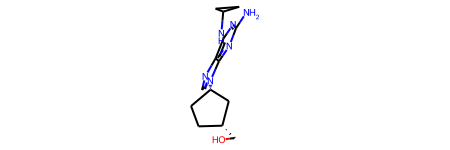

In [34]:
transfer_conf(cana_mol, mol)